# Choosing an Ideal Location for a Bakery in the DuPage County Area of Illinois

## Install and import the common libraries for handling data, visualization, and machine learning

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Obtained data from the 2017 Economic Census for Accommodation and Food Services. Uploaded to personal github and read data into a dataframe

In [2]:
NAICS_data = pd.read_csv('https://raw.githubusercontent.com/OrangeGriffin/Coursera_Capstone/master/CapstoneIndustryData.txt', delimiter='|')

Show the unique categories of of Accomodation and Food Services

In [3]:
NAICS_data.groupby('NAICS2017_TTL').nunique()

,GEOTYPE,ST,COUNTY,PLACE,CONSCITY,CSA,MSA,MD,GEOCOMP,GEO_ID,GEO_TTL,SECTOR,NAICS2017,NAICS2017_TTL,NAICS2017_F,GEO_ID_F,YEAR,FIRM,FIRM_F,ESTAB,ESTAB_F,RCPTOT,RCPTOT_F,PAYANN,PAYANN_F,PAYQTR1,PAYQTR1_F,EMP,EMP_F,RCPTOT_IMP,RCPTOT_IMP_F,PAYANN_IMP,PAYANN_IMP_F,EMP_IMP,EMP_IMP_F
NAICS2017_TTL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accommodation,8,1,75,175,0,12,33,5,2,312,311,1,1,1,0,0,1,49,1,46,1,203,1,200,1,186,1,152,6,1,11,1,9,1,9
Accommodation and food services,8,1,103,554,0,13,35,5,2,792,780,1,1,1,0,0,1,174,1,162,1,621,1,623,1,575,1,499,9,1,9,1,9,1,9
All other traveler accommodation,5,1,2,2,0,3,3,3,2,6,6,1,1,1,0,0,1,3,1,3,1,3,1,4,1,3,1,3,1,1,3,1,2,1,2
Bed-and-breakfast inns,7,1,4,3,0,4,4,3,2,11,11,1,1,1,0,0,1,2,1,2,1,2,1,3,1,2,1,2,2,1,2,1,2,1,2
"Cafeterias, grill buffets, and buffets",7,1,10,3,0,7,8,5,2,23,23,1,1,1,0,0,1,10,1,10,1,13,1,14,1,12,1,13,2,1,5,1,8,1,5
Casino hotels,1,1,1,1,0,1,1,1,1,1,1,1,2,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1
Caterers,8,1,20,44,0,10,13,5,2,91,91,1,2,1,0,0,1,15,1,15,1,35,1,30,1,26,1,27,4,1,6,1,3,1,3
Drinking places (alcoholic beverages),8,1,84,276,0,11,33,5,2,433,428,1,3,1,0,0,1,53,1,51,1,165,1,163,1,126,1,98,5,1,11,1,5,1,8
Food service contractors,8,1,33,83,0,10,21,5,2,159,159,1,2,1,0,0,1,17,1,33,1,70,1,61,1,59,1,58,6,1,8,1,8,1,10


A review of available data for the different places in the DuPage county area showed that data for more specific categories were not always available. Updating dataframe to only show the high-level category of 'Accomation and Food Services.

In [4]:
Illinois_Bakery_Census_Data = NAICS_data.loc[NAICS_data['NAICS2017'] == 72]

In [5]:
Illinois_Bakery_Census_Data.tail(200)

,GEOTYPE,ST,COUNTY,PLACE,CONSCITY,CSA,MSA,MD,GEOCOMP,GEO_ID,GEO_TTL,SECTOR,NAICS2017,NAICS2017_TTL,NAICS2017_F,GEO_ID_F,YEAR,FIRM,FIRM_F,ESTAB,ESTAB_F,RCPTOT,RCPTOT_F,PAYANN,PAYANN_F,PAYQTR1,PAYQTR1_F,EMP,EMP_F,RCPTOT_IMP,RCPTOT_IMP_F,PAYANN_IMP,PAYANN_IMP_F,EMP_IMP,EMP_IMP_F
6462,5,17,159,98159,NaN,999,99999,99999,0,E600000US1715998159,"Balance of Richland County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,0,D,0,D,0,D,308,NaN,0,D,0,b,0,D,0,0,0,D
6463,5,17,161,22073,NaN,209,19340,99999,0,E600000US1716122073,"East Moline city, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,39,NaN,41,NaN,29583,NaN,9087,NaN,2251,NaN,630,NaN,0,0,0,1,0,0
6473,5,17,161,49009,NaN,209,19340,99999,0,E600000US1716149009,"Milan village, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,21,NaN,21,NaN,13941,NaN,3992,NaN,1072,NaN,305,NaN,0,1,0,0,0,0
6482,5,17,161,49867,NaN,209,19340,99999,0,E600000US1716149867,"Moline city, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,134,NaN,149,NaN,145972,NaN,44045,NaN,10786,NaN,3051,NaN,0,1,0,1,0,1
6497,5,17,161,65078,NaN,209,19340,99999,0,E600000US1716165078,"Rock Island city, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,73,NaN,75,NaN,125174,NaN,30808,NaN,7507,NaN,1686,NaN,0,0,0,0,0,0
6512,5,17,161,69979,NaN,209,19340,99999,0,E600000US1716169979,"Silvis city, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,18,NaN,18,NaN,8222,NaN,3049,NaN,710,NaN,191,NaN,0,0,0,0,0,0
6521,5,17,161,98161,NaN,209,19340,99999,0,E600000US1716198161,"Balance of Rock Island County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,39,NaN,39,NaN,14733,NaN,3920,NaN,1001,NaN,300,NaN,0,1,0,0,0,0
6532,5,17,163,4845,NaN,476,41180,99999,0,E600000US1716304845,"Belleville city, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,0,D,0,D,0,D,29265,NaN,0,D,0,g,0,D,0,1,0,D
6551,5,17,163,10370,NaN,476,41180,99999,0,E600000US1716310370,"Cahokia village, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,22,NaN,22,NaN,14371,NaN,3999,NaN,1019,NaN,344,NaN,0,3,0,2,0,2
6559,5,17,163,11644,NaN,476,41180,99999,0,E600000US1716311644,"Caseyville village, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,0,D,0,D,0,D,0,D,0,D,0,e,0,D,0,D,0,D


The location names in this dataset most often contain additional text, such as 'city, Illinois'. Cleaning the 'GEO_TTL' column to remove particular terms from text to assist with dataframe merging later in the notebook.

In [6]:
for i in Illinois_Bakery_Census_Data.index:
    if Illinois_Bakery_Census_Data.at[i, "GEO_TTL"].find('city, Illinois')>-1:
        ind = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"].find('city, Illinois')
        Illinois_Bakery_Census_Data.at[i, "GEO_TTL"] = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"][0:ind-1]
    elif Illinois_Bakery_Census_Data.at[i, "GEO_TTL"].find('village, Illinois')>-1:
        ind = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"].find('village, Illinois')
        Illinois_Bakery_Census_Data.at[i, "GEO_TTL"] = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"][0:ind-1]
    else:
        Illinois_Bakery_Census_Data.at[i, "GEO_TTL"] = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"]
        

Remove a majority of the columns leaving the place, total sales, and annual payroll.

In [7]:
Illinois_Bakery_Census_Data = Illinois_Bakery_Census_Data[['GEO_TTL', 'RCPTOT', 'PAYANN']]

Renaming the GEO_TTL column to Place to assist with merging and analyis later in the notebook.

In [8]:
Illinois_Bakery_Census_Data.rename({'GEO_TTL': 'Place'}, axis='columns', inplace=True)

Obtained Illinois household income data from the United States Census Bureau. Data is part of the 2019 American Community Survey. Loading and showing the table.

In [9]:
il_inc_data = pd.read_csv('https://github.com/OrangeGriffin/Coursera_Capstone/raw/master/Illinois_Household_Income.csv', delimiter=',')

In [10]:
il_inc_data.head(10)

,Geographic Area Name,Estimate!!Households!!Mean income (dollars)
0,"Abingdon city, Illinois",49960
1,"Adair CDP, Illinois",82521
2,"Addieville village, Illinois",79494
3,"Addison village, Illinois",84621
4,"Adeline village, Illinois",63942
5,"Albany village, Illinois",72423
6,"Albers village, Illinois",89034
7,"Albion city, Illinois",56765
8,"Aledo city, Illinois",59021
9,"Alexis village, Illinois",62814


Similar to the first table, this table will have columns renamed and the text of the locations cleaned to be the same format as previous table.

In [11]:
il_inc_data.rename({'Geographic Area Name': 'Place', 'Estimate!!Households!!Mean income (dollars)': 'Mean Income' }, axis='columns', inplace=True)

In [12]:
for i in il_inc_data.index:
    if il_inc_data.at[i, "Place"].find('city, Illinois')>-1:
        ind = il_inc_data.at[i, "Place"].find('city, Illinois')
        il_inc_data.at[i, "Place"] = il_inc_data.at[i, "Place"][0:ind-1]
    elif il_inc_data.at[i, "Place"].find('village, Illinois')>-1:
        ind = il_inc_data.at[i, "Place"].find('village, Illinois')
        il_inc_data.at[i, "Place"] = il_inc_data.at[i, "Place"][0:ind-1]
    else:
        il_inc_data.at[i, "Place"] = il_inc_data.at[i, "Place"]

Calling info() on this dataframe shows the Mean Income column is of data type object. The following two cells display the non-numeric data contained in this column.

In [13]:
il_inc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Place        1369 non-null   object
 1   Mean Income  1369 non-null   object
dtypes: object(2)
memory usage: 21.5+ KB


In [14]:
il_inc_data.sort_values(by='Mean Income', ascending=False)

,Place,Mean Income
1312,"Westervelt CDP, Illinois",N
1032,"Rentchler CDP, Illinois",N
1253,Valley City,N
30,"Annapolis CDP, Illinois",N
419,"Floraville CDP, Illinois",N
489,"Grand Detour CDP, Illinois",99916
1331,Williamsville,99726
59,Aviston,99696
1076,Round Lake,99482
1308,West Chicago,99419


In [15]:
il_inc_data.sort_values(by='Mean Income', ascending=True)

,Place,Mean Income
303,"Darmstadt CDP, Illinois",-0
1061,"Rock Island Arsenal CDP, Illinois",-0
1366,Yorkville,100176
714,Lombard,100270
511,Hainesville,100297
711,Lockport,100386
370,Elk Grove Village,100592
1148,Skokie,100654
773,Maryville,100975
1064,Rolling Meadows,101352


Describe function shows non-numeric data in the mean income column. Removing the 'N', and 0 entires.

In [16]:
for i in il_inc_data.index:
    if il_inc_data.at[i, "Mean Income"] == 'N':
        il_inc_data = il_inc_data.drop([i])
    elif il_inc_data.at[i, "Mean Income"] == '-0':
        il_inc_data = il_inc_data.drop([i])
    else:
        pass

Changing Mean Income column to a numeric data type and displaying info() again to show Mean Income as int data type.

In [17]:
il_inc_data["Mean Income"] = il_inc_data["Mean Income"].apply(pd.to_numeric)
il_inc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1368
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Place        1362 non-null   object
 1   Mean Income  1362 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.9+ KB


### Merge the two tables and displaying 7 rows and the data types of the columns

In [18]:
combined_data = pd.merge(il_inc_data, Illinois_Bakery_Census_Data, on="Place")

In [19]:
combined_data.head(7)

,Place,Mean Income,RCPTOT,PAYANN
0,Abingdon,49960,2064,640
1,Addison,84621,90961,26163
2,Aledo,59021,5192,1683
3,Algonquin,119324,104308,34120
4,Alsip,74224,51563,13845
5,Alton,53625,87444,26379
6,Amboy,65007,2113,411


In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Place        457 non-null    object
 1   Mean Income  457 non-null    int64 
 2   RCPTOT       457 non-null    int64 
 3   PAYANN       457 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.9+ KB


### The goal is to find ideal bakery locations within DuPage county. Using BeaitfulSoup, scraped a listing of 'Places' (cities, towns, villages), from the Wikipedia entry for the county.

In [21]:
!pip install BeautifulSoup4

In [22]:
import requests
from bs4 import BeautifulSoup

In [23]:
url = 'https://en.wikipedia.org/wiki/DuPage_County,_Illinois'
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
places_tags = soup.findAll("div", {"class": "div-col" })
places = []
body = ''

for mytag in places_tags:
    body += mytag.get_text()

places = body.split('\n')    

As with the prior two datasets, cleaning the 'Places' column to mirror their formatting.

In [24]:
clean_places = []

for item in places:
    txt = ''
    txt = item
    if " (part)" in txt:
        remove_ind = txt.find(" (part)")
        txt = txt[0:remove_ind]
        clean_places.append(txt)
    elif " (Part)" in txt:
        remove_ind = txt.find(" (Part)")
        txt = txt[0:remove_ind]
        clean_places.append(txt)
    elif " (mostly)" in txt:
        remove_ind = txt.find(" (mostly)")
        txt = txt[0:remove_ind]
        clean_places.append(txt)
    else:
        clean_places.append(txt)

The data returned contains a number of different locations in addition to the cities and towns we are focusing on. In the cell below, the index of the entry for 'Aurora' is found and used as the first index in a new list 'clean_places'

In [25]:
beg_ind = clean_places.index("Aurora")
places = clean_places[beg_ind:]
clean_places = places

In [26]:
#Some entries contained an extra space character. Removing these where found.
for item in clean_places:
    txt = ''
    txt = item
    if txt == '':
        clean_places.remove(item)

Converting the list to a dataframe

In [27]:
clean_places = pd.DataFrame({'Place':places})

In [28]:
clean_places.head(7)

,Place
0,Aurora
1,Batavia
2,Chicago
3,Darien
4,Elmhurst
5,Naperville
6,Oakbrook Terrace


### Merge this dataframe to the comined data from above. Resulting dataframe is only for the places of interest in DuPage county

In [29]:
dupage_data = pd.merge(clean_places, combined_data, on="Place")

In [30]:
# Remove any places where the sales data is 0.
delete_row = dupage_data[dupage_data["RCPTOT"]==0].index
dupage_data = dupage_data.drop(delete_row)

### Obtain the latitude and longitude coordinates of each location of the places_df dataframe.

In [31]:
address = 'Darien, Illinois'
    
geolocator = Nominatim(user_agent="DuPage_explorer")
location = geolocator.geocode(address)

In [32]:
places = dupage_data['Place'].to_list()

In [33]:
latitude = []
longitude = []
for item in places:
    address = item + ", Illinois"
    # initialize your variable to None
    location = None
    geolocator = Nominatim(user_agent="DuPage_explorer")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

In [34]:
places_df = pd.DataFrame({'Place':places, 'latitude':latitude, 'longitude': longitude})

### Initialize a central location of DuPage county and create a map of the locations in the places_df dataframe

In [35]:
address = "DuPage County, Illinois"

geolocator = Nominatim(user_agent="DuPage_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dupage County is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dupage County is 41.8603735, -88.0906873.


In [36]:
# create map of New York using latitude and longitude values
map_dupage = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, place in zip(places_df['latitude'], places_df['longitude'], places_df['Place']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dupage)  
    
map_dupage

## Using the Foursquare API, will retrieve the venues found in each of the locations in the places_df dataframe

In [37]:
# @hidden_cell
CLIENT_ID = 'NotTheSecret' # your Foursquare ID
CLIENT_SECRET = 'NotTheSecret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [38]:
d_lat = []
d_long = []

In [39]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    d_lat, 
    d_long, 
    radius, 
    LIMIT)

In [40]:
results = requests.get(url).json()

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
dupage_venues = getNearbyVenues(names=places_df['Place'],
                                   latitudes=places_df['latitude'],
                                   longitudes=places_df['longitude']
                                  )

Aurora
Batavia
Chicago
Darien
Elmhurst
Naperville
Oakbrook Terrace
St. Charles
Warrenville
West Chicago
Wood Dale
Addison
Bartlett
Bensenville
Bloomingdale
Bolingbrook
Burr Ridge
Carol Stream
Clarendon Hills
Downers Grove
Elk Grove Village
Glendale Heights
Hanover Park
Hinsdale
Itasca
Lemont
Lisle
Lombard
Oak Brook
Schaumburg
Villa Park
Westmont
Willowbrook
Willow Springs
Winfield
Woodridge


In [52]:
dupage_venues.rename({'Neighborhood': 'Place'}, axis='columns', inplace=True)

Utilize one hot encoding to change categorical data to numerical to enable k-means clustering.

In [54]:
# one hot encoding
dupage_onehot = pd.get_dummies(dupage_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dupage_onehot['Place'] = dupage_venues['Place'] 

# move neighborhood column to the first column
fixed_columns = [dupage_onehot.columns[-1]] + list(dupage_onehot.columns[:-1])
dupage_onehot = dupage_onehot[fixed_columns]

dupage_onehot.head()

,Place,ATM,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Bar,Beer Garden,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Camera Store,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Church,City,Clothing Store,Coffee Shop,College Gym,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food Truck,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Aurora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aurora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Aurora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [55]:
dupage_grouped = dupage_onehot.groupby('Place').mean().reset_index()
dupage_grouped

,Place,ATM,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Bar,Beer Garden,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Camera Store,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Church,City,Clothing Store,Coffee Shop,College Gym,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food Truck,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Addison,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.000000,0.000000,0.034483,0.034483,0.034483,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.034483,0.000000,0.000000,0.000000,0.0000,0.103448,0.000000,0.000000,0.000000,0.034483,0.000000,0.068966,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0000,0.00,0.000000,0.00,0.103448,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.0,0.000000,0.034483,0.000000,0.000000,0.137931,0.000000,0.000000,0.00

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
places_venues_sorted = pd.DataFrame(columns=columns)
places_venues_sorted['Place'] = dupage_grouped['Place']

for ind in np.arange(dupage_grouped.shape[0]):
    places_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dupage_grouped.iloc[ind, :], num_top_venues)

places_venues_sorted.head()

,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,Pizza Place,Mexican Restaurant,Ice Cream Shop,Thai Restaurant,Italian Restaurant,Hot Dog Joint,Other Great Outdoors,Donut Shop,Spa,Gift Shop
1,Aurora,Mexican Restaurant,Theater,Pizza Place,Pub,Sandwich Place,Bookstore,Brazilian Restaurant,Café,Casino,Science Museum
2,Bartlett,Pizza Place,Business Service,Irish Pub,Sandwich Place,Chinese Restaurant,Mexican Restaurant,BBQ Joint,Train Station,Gift Shop,Italian Restaurant
3,Batavia,Pizza Place,Taco Place,Bar,Bakery,Fast Food Restaurant,Salon / Barbershop,Chinese Restaurant,Breakfast Spot,Record Shop,Coffee Shop
4,Bensenville,Park,Deli / Bodega,Gas Station,Food,Multiplex,Grocery Store,Baseball Field,Bakery,Bank,Diner


Merge the dataframe above with the dataframe containing the income and economic data.

In [58]:
learning_df = pd.merge(dupage_grouped, dupage_data, on="Place")

In [59]:
learning_df

,Place,ATM,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Bar,Beer Garden,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Camera Store,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Church,City,Clothing Store,Coffee Shop,College Gym,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food Truck,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Mean Income,RCPTOT,PAYANN
0,Addison,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.000000,0.000000,0.034483,0.034483,0.034483,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.034483,0.000000,0.000000,0.000000,0.0000,0.103448,0.000000,0.000000,0.000000,0.034483,0.000000,0.068966,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0000,0.00,0.000000,0.00,0.103448,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.0,0.000000,0.034483,0.000000,0.000000,0.137

In [60]:
from sklearn.preprocessing import StandardScaler
X = learning_df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.25166413, -0.22620479, -0.60816057, ..., -0.78257475,
        -0.1849979 , -0.18482201],
       [-0.25166413, -0.22620479, -0.60816057, ..., -0.57853579,
        -0.08991782, -0.10101888],
       [-0.25166413, -0.22620479, -0.60816057, ..., -0.03456052,
        -0.20996066, -0.20887501],
       ...,
       [-0.25166413, -0.22620479, -0.60816057, ...,  0.17445451,
        -0.22270261, -0.22237657],
       [-0.25166413, -0.22620479, -0.60816057, ..., -0.65323769,
        -0.19854398, -0.21058969],
       [-0.25166413, -0.22620479, -0.60816057, ..., -0.36322451,
        -0.19508833, -0.19270883]])

In [61]:
# set number of clusters
kclusters = 6

#learning_df_clustering = learning_df.drop('Place', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 3], dtype=int32)

In [62]:
# add clustering labels
learning_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [63]:
# merge dupage_grouped with dupage_data to add latitude/longitude for each neighborhood
dupage_merged = places_df.join(learning_df.set_index('Place'), on='Place')

dupage_merged.head()
dupage_merged = dupage_merged.dropna()

In [64]:
dupage_merged.groupby(dupage_merged['Cluster Labels'])

### Dispaly locations of clusters

In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dupage_merged['latitude'], dupage_merged['longitude'], dupage_merged['Place'], dupage_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Create and show dataframes for each cluster.

In [66]:
dupage_merged.loc[dupage_merged['Cluster Labels'] == 0]
clust_0 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 0]
clust_0 = clust_0[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_0 = clust_0.join(places_venues_sorted.set_index('Place'), on='Place')
clust_0

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aurora,94667,281801,75477,Mexican Restaurant,Theater,Pizza Place,Pub,Sandwich Place,Bookstore,Brazilian Restaurant,Café,Casino,Science Museum
1,Batavia,122297,66089,19141,Pizza Place,Taco Place,Bar,Bakery,Fast Food Restaurant,Salon / Barbershop,Chinese Restaurant,Breakfast Spot,Record Shop,Coffee Shop
3,Darien,122374,42610,11462,Burrito Place,Intersection,Gas Station,BBQ Joint,Fast Food Restaurant,Salon / Barbershop,Supermarket,Liquor Store,Grocery Store,Coffee Shop
4,Elmhurst,163347,128273,37225,Pizza Place,Coffee Shop,Italian Restaurant,Gym,Beer Bar,Sandwich Place,Bar,Sushi Restaurant,Yoga Studio,Breakfast Spot
6,Oakbrook Terrace,89327,75321,22104,Men's Store,Italian Restaurant,Mattress Store,Mobile Phone Shop,Sporting Goods Shop,Seafood Restaurant,Sandwich Place,Salon / Barbershop,Gastropub,Clothing Store
8,Warrenville,101357,61053,17710,Pizza Place,Pharmacy,Dive Bar,Donut Shop,Yoga Studio,Exhibit,Football Stadium,Food Truck,Food,Flower Shop
9,West Chicago,99419,37194,10673,ATM,Business Service,Dessert Shop,Pet Store,Mexican Restaurant,Hostel,Electronics Store,Food,Flower Shop,Hot Dog Joint
10,Wood Dale,90989,63772,11000,Bar,Breakfast Spot,Train Station,Pet Store,Sandwich Place,Bowling Alley,Gas Station,Greek Restaurant,Pizza Place,Italian Restaurant
11,Addison,84621,90961,26163,Pizza Place,Mexican Restaurant,Ice Cream Shop,Thai Restaurant,Italian Restaurant,Hot Dog Joint,Other Great Outdoors,Donut Shop,Spa,Gift Shop
12,Bartlett,121450,40857,12009,Pizza Place,Business Service,Irish Pub,Sandwich Place,Chinese Restaurant,Mexican Restaurant,BBQ Joint,Train Station,Gift Shop,Italian Restaurant


In [67]:
clust_0.describe()

,Mean Income,RCPTOT,PAYANN
count,31.000000,31.000000,31.000000
mean,118992.645161,105094.677419,29999.645161
std,47833.923836,121805.485918,35904.847512
min,76195.000000,8368.000000,2258.000000
25%,93026.500000,41733.500000,11231.000000
50%,105268.000000,66089.000000,18708.000000
75%,121873.500000,91512.000000,26602.500000
max,305922.000000,627748.000000,181395.000000


In [68]:
clust_1 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 1]
clust_1 = clust_1[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_1 = clust_1.join(places_venues_sorted.set_index('Place'), on='Place')
clust_1

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Naperville,154724,575534,181857,Mexican Restaurant,American Restaurant,Pizza Place,Bar,Cosmetics Shop,Clothing Store,Ice Cream Shop,Sandwich Place,Coffee Shop,Italian Restaurant


In [69]:
clust_2 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 2]
clust_2 = clust_2[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_2 = clust_2.join(places_venues_sorted.set_index('Place'), on='Place')
clust_2

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Burr Ridge,249719,43004,13875,Clothing Store,Sushi Restaurant,Mexican Restaurant,Bank,Men's Store,Steakhouse,Mobile Phone Shop,Sporting Goods Shop,Kids Store,Breakfast Spot


In [70]:
clust_3 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 3]
clust_3 = clust_3[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_3 = clust_3.join(places_venues_sorted.set_index('Place'), on='Place')
clust_3

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chicago,90713,12308450,3607438,Coffee Shop,Sandwich Place,Hotel,Pizza Place,Museum,Boutique,Bookstore,Fountain,Concert Hall,Music Venue


In [71]:
clust_4 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 4]
clust_4 = clust_4[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_4 = clust_4.join(places_venues_sorted.set_index('Place'), on='Place')
clust_4

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,St. Charles,127698,257979,67715,Italian Restaurant,Bar,Café,Mexican Restaurant,Sushi Restaurant,Pizza Place,Pub,Indian Restaurant,Breakfast Spot,Spa


In [72]:
clust_5 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 5]
clust_5 = clust_5[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_5 = clust_5.join(places_venues_sorted.set_index('Place'), on='Place')
clust_5

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Downers Grove,121832,199162,56304,Hobby Shop,Italian Restaurant,Arts & Crafts Store,Sandwich Place,Pizza Place,Coffee Shop,Yoga Studio,Chinese Restaurant,Bowling Alley,Breakfast Spot


### Create new dataframe to review the income information for each cluster.

In [73]:
clust_analysis = dupage_merged[["Cluster Labels", "Place", "Mean Income", "RCPTOT", "PAYANN"]]

In [74]:
clust_mean = clust_analysis.groupby('Cluster Labels').agg(['mean'])
clust_mean

,Mean Income,RCPTOT,PAYANN
,mean,mean,mean
Cluster Labels,,,
0,118992.645161,1.050947e+05,2.999965e+04
1,154724.000000,5.755340e+05,1.818570e+05
2,249719.000000,4.300400e+04,1.387500e+04
3,90713.000000,1.230845e+07,3.607438e+06
4,127698.000000,2.579790e+05,6.771500e+04
5,121832.000000,1.991620e+05,5.630400e+04


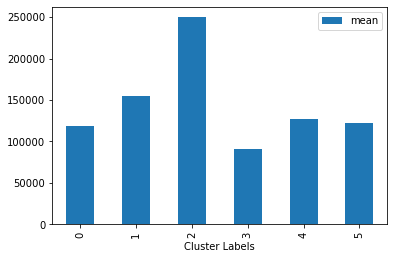

In [75]:
clust_mean["Mean Income"].plot(kind = "bar")
plt.show()

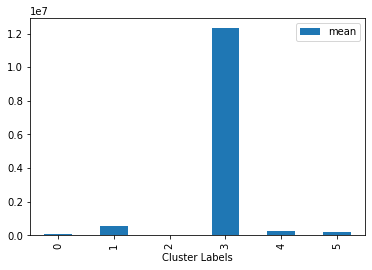

In [76]:
clust_mean["RCPTOT"].plot(kind="bar")

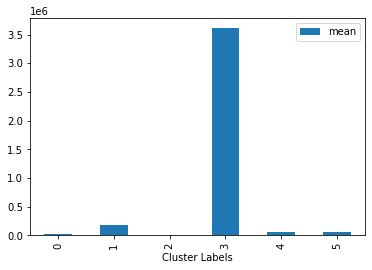

In [77]:
clust_mean["PAYANN"].plot(kind="bar")

### The sales and payroll data for cluster 1, which is specfically Chicago make comparisons between the other clusters difficult. Removing this cluster and reviewing resulting graphs.

In [78]:
# Remove any places where the sales data is 0.
delete_row = clust_analysis[clust_analysis["Cluster Labels"]==3.0].index
clust_analysis = clust_analysis.drop(delete_row)

# Remove any places where the sales data is 0.
#delete_row = dupage_data[dupage_data["RCPTOT"]==0].index
#dupage_data = dupage_data.drop(delete_row)

In [79]:
clust_mean = clust_analysis.groupby('Cluster Labels').agg(['mean'])
clust_mean.columns=["Income", "Sales", "Payroll"]

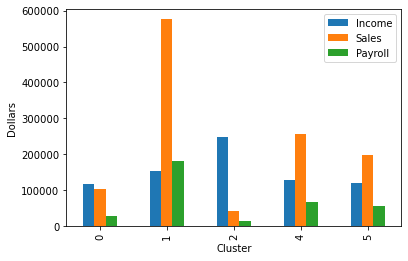

In [80]:
clust_mean.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Dollars")
plt.show()